In [1]:
from obspy.core import UTCDateTime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import pandas as pd
pd.plotting.register_matplotlib_converters()

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

headers = ['Station', 'First_Connection', 'Online_Status'] 

full_inv = pd.read_csv('firstconn-status-20191109.csv',
                  index_col=1,
                  header=None,
                  names=headers,
                  date_parser=lambda t:pd.to_datetime(str(t),
                                                      format='%Y-%m-%dT%H:%M:%SZ'))

online = full_inv[full_inv.Online_Status == 1]
online.insert(0, 'Number_Online', range(1, 1+(len(online))))

# datetime format
fmt = '%Y-%m-%dT%H:%M:%S'.replace(':','%%3A')

In [2]:
def make_plot(ymax):
    fig, ax = plt.subplots(figsize=(14, 8))
    plt.ylim(0,ymax*1.05)
    # titles
    ax.set_ylabel('Raspberry Shake Stations')
    ax.set_xlabel('Time')
    # ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    # labels
    ax.format_xdata = mdates.DateFormatter(fmt)
    fig.autofmt_xdate()
    # grid
    plt.grid(b=True, which='major', axis='both', dashes=(1,7))
    return fig, ax

In [3]:
# here are the stations that remain online today (2019-11-09)
online

,Number_Online,Station,Online_Status
First_Connection,,,
2016-11-25 16:25:21,1,RCDC4,1
2016-11-25 16:25:58,2,R10DC,1
2016-11-26 20:05:13,3,R2285,1
2016-12-01 20:26:28,4,R71AD,1
2016-12-02 01:30:51,5,R368D,1
...,...,...,...
2019-11-08 22:36:51,1029,R6197,1
2019-11-08 22:48:20,1030,RFA62,1
2019-11-09 05:55:30,1031,R6314,1


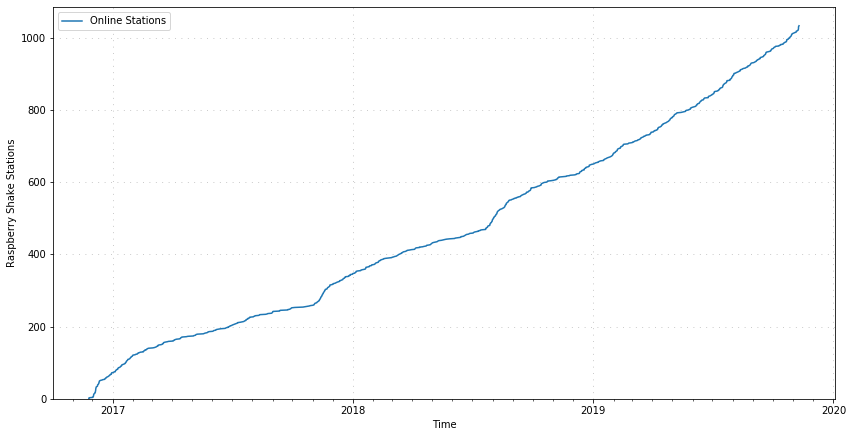

In [4]:
fig, ax = make_plot(ymax=online.Number_Online.max())
plt.plot(online.index, online.Number_Online, label='Online Stations')
plt.legend()
plt.savefig('img/online.png', bbox_inches='tight')
plt.show()